### Introduction

In this project we are going to train a k-means clustering algorithm to group companies based on their stock market movements over a 2-year period.
The goal of the project will be to find similarities amongst companies that we might otherwise not be able to detect. To do this, the k-means clustering algorithm will produce labels that assign each company to different clusters.

We will also perform *principle component analysis* for dimensionality reduction.

### Data

The data used here is of 24 major companies.The data itself has been collected from yahoo finance using data reader.

**pandas_datareader** extracts data from various internet sources into a DataFrame. Currently, the following sources are supported:
- Yahoo! Finance
- Google Finance
- World Bank
- Google Analytics
and few others

##### Some of the parameters related to the data are:

- **High** :  Highest price during the day.
- **Low** : Lowest price during the day.
- **Open**: Opening price of the day.
- **Close**: Closing price of the day.
- **Volume**: Total number of shares of stock traded during the day.
- **Adj Close**: The closing price is amended to account for any corporate actions to give the ‘Adjusted closing’ price.

In [1]:
#pip install pandas-datareader

In [2]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime

In [3]:
# the dictionary keys are the names of the companies and values are the stock codes. 
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC', 
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
'American Express': 'AXP',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Toyota': 'TM',
'Honda': 'HMC',
'Exxon': 'XOM',
'Chevron': 'CVX',
'Valero Energy': 'VLO',
'Ford': 'F',
'Bank of America': 'BAC'}

In [4]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])
print(companies)


[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Microsoft', 'MSFT'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [5]:
# In this project we will get the stock data from yahoo.
data_source = 'yahoo'

# Define the start and end dates that we want to see
start_date = '2017-01-01'
end_date = '2019-12-31'

# Use pandas_reader.data.DataReader to load the desired data.
stock_data = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)


In [6]:
stock_data

Attributes    Adj Close                                                \
Symbols            AMZN       AAPL        WBA         NOC          BA   
Date                                                                    
2017-01-03   753.669983  27.372362  71.727982  218.657150  145.533676   
2017-01-04   757.179993  27.341724  71.745277  218.992264  147.063477   
2017-01-05   780.450012  27.480770  71.788513  219.681137  147.146927   
2017-01-06   795.989990  27.787130  71.849030  220.369980  147.508514   
2017-01-09   796.919983  28.041647  71.373482  219.513580  146.785309   
...                 ...        ...        ...         ...         ...   
2019-12-24  1789.209961  70.129517  54.346359  338.253510  331.030457   
2019-12-26  1868.770020  71.520905  54.858624  339.111115  327.968689   
2019-12-27  1869.800049  71.493759  54.970387  337.629822  328.187408   
2019-12-30  1846.890015  71.918083  54.867935  340.192902  324.469513   
2019-12-31  1847.839966  72.443558  54.914501  335.222595  323.833313   

Attributes                                                             ...  \
Symbols            LMT         MCD       INTC         IBM         TXN  ...   
Date                                                                   ...   
2017-01-03  225.550034  107.097153  32.440598  134.699081   64.976089  ...   
2017-01-04  226.155518  106.971786  32.272194  136.366806   64.896614  ...   
2017-01-05  227.927414  107.168755  32.219013  135.915649   64.393265  ...   
2017-01-06  229.592468  108.117798  32.334232  136.584320   65.479454  ...   
2017-01-09  229.556885  107.822342  32.449463  135.069672   65.647224  ...   
...                ...         ...        ...         ...         ...  ...   
2019-12-24  374.972717  189.661789  56.896416  123.739563  122.737793  ...   
2019-12-26  377.019775  190.037888  57.289066  123.675400  122.690025  ...   
2019-12-27  378.269135  191.108337  57.538074  124.005402  122.775986  ...   
2019-12-30  376.635376  189.893250  57.097530  121.750267  121.906990  ...   
2019-12-31  374.213501  190.568314  57.317799  122.877831  122.508583  ...   

Attributes     Volume                                                         \
Symbols           PEP          KO        JNJ        TM       HMC         XOM   
Date                                                                           
2017-01-03  3741200.0  14711000.0  5953000.0  204000.0  864500.0  10360600.0   
2017-01-04  3029700.0   9959400.0  5828900.0  250600.0  705500.0   9434200.0   
2017-01-05  5087200.0   8968300.0  6217200.0  525900.0  482600.0  14443200.0   
2017-01-06  4109700.0  10246600.0  5221400.0  171600.0  493600.0  16518100.0   
2017-01-09  5603500.0  14822500.0  5457500.0  135800.0  585200.0  13762300.0   
...               ...         ...        ...       ...       ...         ...   
2019-12-24  1220600.0   3359300.0  4238900.0   66700.0  157600.0   3979400.0   
2019-12-26  2934700.0   6228500.0  3019300.0   73700.0  230000.0   8840200.0   
2019-12-27  2554000.0   6895500.0  3432700.0  133000.0  336500.0  10516100.0   
2019-12-30  3024700.0   6431700.0  2923300.0   91800.0  498600.0  12689400.0   
2019-12-31  3229400.0   7982600.0  4435000.0   89700.0  270500.0  13151800.0   

Attributes                                                
Symbols           CVX        VLO           F         BAC  
Date                                                      
2017-01-03  7404800.0  4425000.0  40510800.0  99298100.0  
2017-01-04  6679900.0  7431000.0  77638100.0  76875100.0  
2017-01-05  5928600.0  6450600.0  75628400.0  86826400.0  
2017-01-06  4762500.0  3771700.0  40315900.0  66281500.0  
2017-01-09  6891800.0  5132600.0  39438400.0  75901500.0  
...               ...        ...         ...         ...  
2019-12-24  1640100.0   559800.0  11881600.0  13805400.0  
2019-12-26  3648600.0  1205800.0  28961300.0  26992100.0  
2019-12-27  4138300.0  1752400.0  28272800.0  28111300.0  
2019-12-30  4580200.0  2186800.0  36074900.0  30705100.

This is a multi index pandas dataframe.

In [7]:
stock_data.columns

MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',  'WBA'),
            ('Adj Close',  'NOC'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'LMT'),
            ('Adj Close',  'MCD'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'IBM'),
            ('Adj Close',  'TXN'),
            ...
            (   'Volume',  'PEP'),
            (   'Volume',   'KO'),
            (   'Volume',  'JNJ'),
            (   'Volume',   'TM'),
            (   'Volume',  'HMC'),
            (   'Volume',  'XOM'),
            (   'Volume',  'CVX'),
            (   'Volume',  'VLO'),
            (   'Volume',    'F'),
            (   'Volume',  'BAC')],
           names=['Attributes', 'Symbols'], length=144)

In [8]:
stock_data.dtypes

Attributes  Symbols
Adj Close   AMZN       float64
            AAPL       float64
            WBA        float64
            NOC        float64
            BA         float64
                        ...   
Volume      XOM        float64
            CVX        float64
            VLO        float64
            F          float64
            BAC        float64
Length: 144, dtype: object

In [9]:
stock_data.shape

(754, 144)

In [10]:
stock_data.axes

[DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
                '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
                '2017-01-13', '2017-01-17',
                ...
                '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
                '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
                '2019-12-30', '2019-12-31'],
               dtype='datetime64[ns]', name='Date', length=754, freq=None),
 MultiIndex([('Adj Close', 'AMZN'),
             ('Adj Close', 'AAPL'),
             ('Adj Close',  'WBA'),
             ('Adj Close',  'NOC'),
             ('Adj Close',   'BA'),
             ('Adj Close',  'LMT'),
             ('Adj Close',  'MCD'),
             ('Adj Close', 'INTC'),
             ('Adj Close',  'IBM'),
             ('Adj Close',  'TXN'),
             ...
             (   'Volume',  'PEP'),
             (   'Volume',   'KO'),
             (   'Volume',  'JNJ'),
             (   'Volume',   'TM'),
      

In [11]:
# Find Stock Open and Close Values
stock_close = stock_data['Close']
stock_open = stock_data['Open']

In [12]:
print(stock_close.iloc[0]) #the closing value of the first day for e.g

Symbols
AMZN    753.669983
AAPL     29.037500
WBA      82.959999
NOC     234.889999
BA      156.970001
LMT     253.309998
MCD     119.620003
INTC     36.599998
IBM     167.190002
TXN      73.580002
MA      105.389999
MSFT     62.580002
GE      243.769226
AXP      75.349998
PEP     104.650002
KO       41.799999
JNJ     115.839996
TM      118.550003
HMC      29.610001
XOM      90.889999
CVX     117.849998
VLO      70.419998
F        12.590000
BAC      22.530001
Name: 2017-01-03 00:00:00, dtype: float64


In [13]:
print(stock_open.iloc[0]) #the opening value of first day

Symbols
AMZN    757.919983
AAPL     28.950001
WBA      83.099998
NOC     234.100006
BA      156.300003
LMT     251.199997
MCD     121.860001
INTC     36.610001
IBM     167.000000
TXN      73.529999
MA      104.410004
MSFT     62.790001
GE      243.615387
AXP      74.889999
PEP     104.940002
KO       41.500000
JNJ     115.779999
TM      118.169998
HMC      29.480000
XOM      90.940002
CVX     118.379997
VLO      69.550003
F        12.200000
BAC      22.600000
Name: 2017-01-03 00:00:00, dtype: float64


In [14]:
# stock-open and stock-close in terms of numpy array:
stock_open = np.array(stock_data['Open']).T # stock_open is numpy array of transpose of stock_data['Open']
stock_close = np.array(stock_data['Close']).T

In [15]:
rows,col = stock_close.shape
print(rows)
print(col)

24
754


We can see that we have 24 companies and total of 754 days.

**Calculating daily stock movements**

**Stock movememt** is the difference between the opening and closing prices of a day.

**Sum_of_movement** of a company is defined as sum of differences of closing and opening prices of all days.

In [16]:
movements = stock_close - stock_open
sum_of_movement = np.sum(movements,1)

In [17]:
movements

array([[ -4.25      ,  -1.21002197,  18.90002441, ..., -13.11999512,
        -27.10998535,   5.83996582],
       [  0.08749962,   0.04249954,   0.17250061, ...,  -0.33000183,
          0.51499939,   0.93000031],
       [ -0.13999939,  -0.31999969,   1.02999878, ...,   0.10000229,
         -0.18000031,   0.13999939],
       ...,
       [  0.86999512,  -1.65000153,  -0.70999908, ...,  -1.58000183,
         -0.13000488,   0.70000458],
       [  0.39000034,   0.39999962,  -0.43999958, ...,  -0.09000015,
         -0.09000015,   0.05000019],
       [ -0.06999969,   0.23000145,  -0.13999939, ...,  -0.35000229,
         -0.41999817,   0.19000244]])

In [18]:
# printing the movements along with company name:

for i in range(len(companies)):
    print('Company: {}, Change: {}'.format(stock_data.columns[i][1],sum_of_movement[i]))  #each column is a tuple so 1.

Company: AMZN, Change: -504.60015869140625
Company: AAPL, Change: 27.39501953125
Company: WBA, Change: -32.739986419677734
Company: NOC, Change: -24.72064208984375
Company: BA, Change: 85.99972534179688
Company: LMT, Change: -47.93971252441406
Company: MCD, Change: -10.049964904785156
Company: INTC, Change: 15.54000473022461
Company: IBM, Change: -49.39971160888672
Company: TXN, Change: 26.349945068359375
Company: MA, Change: 51.199981689453125
Company: MSFT, Change: -3.890026092529297
Company: GE, Change: -149.99381256103516
Company: AXP, Change: 0.470123291015625
Company: PEP, Change: 7.750099182128906
Company: KO, Change: 7.289997100830078
Company: JNJ, Change: 6.119964599609375
Company: TM, Change: -16.17992401123047
Company: HMC, Change: -9.17000961303711
Company: XOM, Change: -24.850074768066406
Company: CVX, Change: -38.81989288330078
Company: VLO, Change: -11.969917297363281
Company: F, Change: -6.680003643035889
Company: BAC, Change: 0.7799644470214844


**The companies where change is positive, we can buy that stock and where it is negative, we should sell.**

### Visualizations

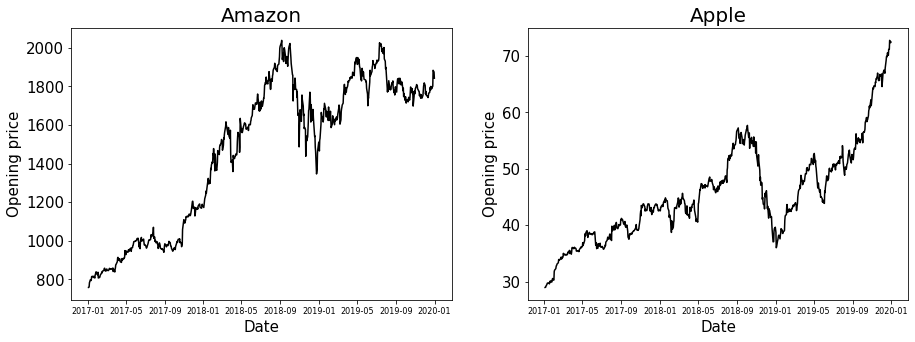

In [19]:
# Some plots to visualize the opening and closing prices of two companies:

plt.figure(figsize = (15,5)) 

plt.subplot(121) 
plt.title('Amazon',fontsize = 20)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 15)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(stock_data['Open']['AMZN'],'k')

 
plt.subplot(122) 
plt.title('Apple',fontsize = 20)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 15)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(stock_data['Open']['AAPL'],'k')


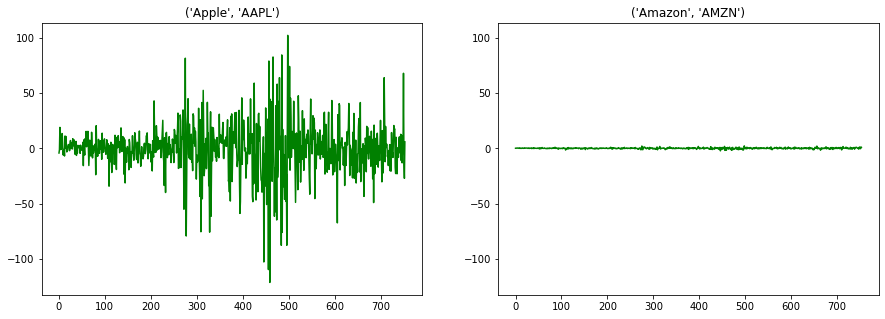

In [20]:
# plotting the movemnets

plt.figure(figsize=(15,5))
ax1= plt.subplot(121)
plt.plot(movements[0][:],'g')
plt.title(companies[0])

plt.subplot(122,sharey=ax1)
plt.plot(movements[1][:],'g')
plt.title(companies[1])
plt.show()

What we can see from these two stocks is that we have different scales between the price movements. This means we need to do a **normalization step** before we apply k-means clustering.

### Model

We will be using k means clustering to group companies based on daily stock movements.

**K-Means Clustering:** Clustering is an unsupervised machine learning algorithm which involves dividing the entire data into groups (also known as clusters) based on the patterns in the data. Clustering is a widely used technique in the industry. It is actually being used in almost every domain, ranging from banking to recommendation engines, document clustering to image segmentation.

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.
*The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.*

Algorithm:
- **Step 1:** The first step in k-means is to pick the number of clusters, k.
- **Step 2:** Next, we randomly select the centroid for each cluster. Let’s say we want to have 2 clusters, so k is equal to 2 here. We then randomly select the centroid for each of these clusters.
- **Step 3:** Once we have initialized the centroids, we assign each point to the closest cluster centroid.
- **Step 4:** Recompute the centroids of newly formed clusters.Once we have assigned all of the points to either cluster, the next step is to compute the centroids of newly formed clusters.
- **Step 5:** Repeat steps 3 and 4.

Stopping Criteria for K-Means Clustering:
There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:
- Centroids of newly formed clusters do not change
- Points remain in the same cluster
- Maximum number of iterations are reached

In [21]:
stock_data.describe()

Attributes    Adj Close                                                  \
Symbols            AMZN        AAPL         WBA         NOC          BA   
count        754.000000  754.000000  754.000000  754.000000  754.000000   
mean        1466.788952   44.180329   61.659956  284.476826  297.983058   
std          384.674691    8.835500    8.498216   39.969458   73.810424   
min          753.669983   27.341724   45.155109  211.275208  145.533676   
25%         1003.184998   37.489974   55.570701  252.037868  242.664055   
50%         1605.509949   42.464657   61.931894  283.789322  328.345978   
75%         1787.742462   49.862494   69.463469  313.493324  349.194206   
max         2039.510010   72.443558   77.370743  371.038513  430.299988   

Attributes                                                              ...  \
Symbols            LMT         MCD        INTC         IBM         TXN  ...   
count       754.000000  754.000000  754.000000  754.000000  754.000000  ...   
mean        295.642103  159.415091   42.677547  125.054425   94.022884  ...   
std          39.885969   25.757203    7.260914    9.124504   16.071237  ...   
min         223.404129  106.971786   30.091368   94.098885   64.393265  ...   
25%         272.276665  144.567299   35.407139  121.258448   80.717577  ...   
50%         290.364700  154.212608   43.995289  124.728809   95.929260  ...   
75%         319.638390  179.230991   47.988181  129.093002  105.062201  ...   
max         379.252228  210.838211   57.538074  147.749786  124.814484  ...   

Attributes        Volume                                             \
Symbols              PEP            KO           JNJ             TM   
count       7.540000e+02  7.540000e+02  7.540000e+02     754.000000   
mean        4.351399e+06  1.225216e+07  6.871945e+06  183997.480106   
std         1.829997e+06  4.972239e+06  3.507888e+06   92199.241968   
min         1.183000e+06  2.996300e+06  2.469500e+06   48400.000000   
25%         3.232025e+06  9.230625e+06  5.101400e+06  119450.000000   
50%         3.994000e+06  1.143355e+07  6.154600e+06  159900.000000   
75%         5.032150e+06  1.389162e+07  7.638450e+06  225600.000000   
max         2.755970e+07  5.890540e+07  5.814020e+07  952800.000000   

Attributes                                                          \
Symbols              HMC           XOM           CVX           VLO   
count       7.540000e+02  7.540000e+02  7.540000e+02  7.540000e+02   
mean        6.552447e+05  1.206828e+07  6.197533e+06  3.656515e+06   
std         3.372088e+05  4.559755e+06  2.637833e+06  1.337282e+06   
min         1.576000e+05  3.851300e+06  1.640100e+06  5.598000e+05   
25%         4.165250e+05  9.219000e+06  4.684350e+06  2.787675e+06   
50%         5.608000e+05  1.100270e+07  5.673750e+06  3.350950e+06   
75%         7.778500e+05  1.386132e+07  6.988375e+06  4.270350e+06   
max         2.567300e+06  4.728730e+07  4.269370e+07  1.181810e+07   

Attributes                              
Symbols                F           BAC  
count       7.540000e+02  7.540000e+02  
mean        3.985812e+07  6.698125e+07  
std         1.626750e+07  2.680503e+07  
min         9.549600e+06  1.380540e+07  
25%         2.920822e+07  4.833452e+07  
50%         3.646005e+07  6.108385e+07  
75%         4.591962e+07  7.962260e+07  
max         1.561367e+08  2.595458e+08  

[8 rows x 144 columns]

We can see that the scales are varying so we have to normalize the data first. We will create a pipeline that will normalize the data and then apply KMeans Clustering to it.

In [22]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

(OPTIONAL STEP):

Text(0, 0.5, 'Inertia')

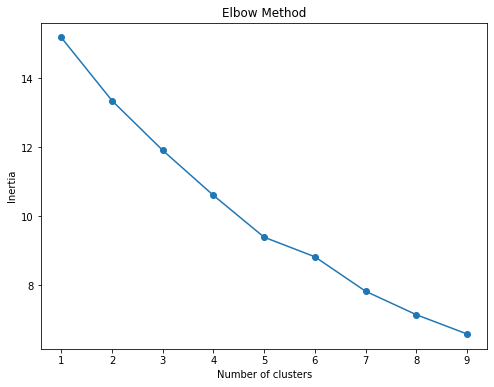

In [37]:
#Let's get an idea about how many clusters we need first.
#fitting multiple k-means algorithms and storing the values in an empty list
Inertia = []
for cluster in range(1,10):
    pipe = Pipeline([('normalizer',Normalizer()),('kmeans',KMeans(n_clusters=cluster ,max_iter=1000,init ='k-means++'))])
    pipe.fit(movements)
    Inertia.append(pipe.named_steps['kmeans'].inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'Inertia':Inertia})
plt.figure(figsize=(8,6))
plt.plot(frame['Cluster'], frame['Inertia'], marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [38]:
#creating pipeline

pipe = Pipeline([('normalizer',Normalizer()),('kmeans',KMeans(n_clusters=8,max_iter=1000,init='k-means++'))])

In [39]:
#fit pipeline to movements:

pipe.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000))])

In [40]:
labels = pipe.predict(movements)
labels

array([3, 3, 7, 6, 6, 6, 0, 3, 1, 3, 3, 3, 5, 2, 0, 0, 0, 2, 2, 4, 4, 4,
       2, 2])

In [41]:
pipe.named_steps['kmeans'].inertia_

7.199791697404524

**Intertia is a score of how close each cluster is, so a lower inertia score is better. In this case, we get a score of 7.1.**

In [42]:
pipe.named_steps['kmeans'].cluster_centers_

array([[-0.00789438, -0.00435165,  0.01257585, ...,  0.0164862 ,
        -0.00418499,  0.01410118],
       [ 0.00512581,  0.04019637, -0.01483777, ...,  0.00728407,
        -0.06447647,  0.04073604],
       [ 0.03314093,  0.06218401, -0.03944667, ..., -0.03119202,
        -0.03197003,  0.01062445],
       ...,
       [ 0.00295727, -0.00739347, -0.00739376, ...,  0.00153789,
         0.00153789,  0.02460558],
       [ 0.0113591 ,  0.001734  ,  0.00866645, ..., -0.00778435,
        -0.01233426, -0.02035585],
       [-0.00574677, -0.01313553,  0.04227997, ...,  0.00410495,
        -0.00738875,  0.00574677]])

In [43]:
# Create a DataFrame aligning labels and companies: 

df = pd.DataFrame({'labels':labels,'companies':list(companies)}).sort_values(by=['labels'],axis = 0)
df


,labels,companies
16,0,"(Microsoft, MSFT)"
15,0,"(McDonalds, MCD)"
14,0,"(MasterCard, MA)"
6,0,"(Ford, F)"
8,1,"(Honda, HMC)"
23,2,"(Exxon, XOM)"
18,2,"(Pepsi, PEP)"
17,2,"(Northrop Grumman, NOC)"
13,2,"(Lockheed Martin, LMT)"
22,2,"(Walgreen, WBA)"


We can see that the model has assigned cluster numbers to different companies based on how similar their stock movemnets were.

If the pipeline is run again, we get different cluster formation results as the beginning step of initialization of centroids is random in K-Means clustering.

### Principle Component Analysis

Dimensionality Reduction is simply reducing the number of features (columns) while retaining maximum information. Following are reasons for Dimensionality Reduction:
- Dimensionality Reduction helps in data compression, and hence reduced storage space.
- It reduces computation time.
- It also helps remove redundant features, if any.
- Removes Correlated Features.
- Reducing the dimensions of data to 2D or 3D may allow us to plot and visualize it precisely. You can then observe patterns more clearly.

In PCA, we find new dimensions (features) that capture maximum variance (i.e. information). It doesn’t eliminate features but instead forms new features from existing ones with lower dimensions.

The given data has 144 columns. Using PCA it is reduced to a 2 dimensional data with 2 features and then k-means clustering is applied. This way we can plot the clustered companies on a two dimensional graph.

In [44]:
from sklearn.decomposition import PCA

In [45]:
# Define a normalizer
norm = Normalizer()
normalized_mov = norm.fit_transform(movements)

# Reduce the data
pca_check = PCA()
reduced_data_check= pca_check.fit_transform(normalized_mov)


In [47]:
df_pca_check=pd.DataFrame(reduced_data_check)
df_pca_check.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.417239,-0.265436,-0.162057,0.078182,0.123562,-0.002168,0.074532,-0.025698,-0.032064,0.053110,...,-0.032075,-0.123647,-0.117985,0.036966,0.008120,0.358670,-0.093885,-0.007838,-0.063142,9.721962e-17
1,-0.313948,-0.182379,-0.247862,0.033870,0.160893,0.024594,0.061500,0.027811,-0.056182,0.060583,...,0.353638,0.044913,0.173295,-0.041311,-0.092149,-0.117934,-0.050015,-0.013034,0.002120,9.721962e-17
2,0.103403,0.218547,-0.133409,-0.195763,0.321368,0.508090,0.333837,0.210866,0.313591,-0.021540,...,-0.089350,0.065196,-0.007347,-0.019621,-0.006830,-0.006278,-0.022398,-0.000124,-0.012786,9.721962e-17
3,0.064716,-0.346534,0.658481,-0.093844,0.019706,-0.001941,-0.058742,0.031996,0.103222,-0.096436,...,-0.024427,0.035477,-0.031846,0.021176,0.006376,0.001326,-0.058138,-0.255169,0.035212,9.721962e-17
4,-0.115495,-0.108303,0.341962,-0.036194,0.007156,0.279338,-0.062760,-0.089008,-0.228102,0.256731,...,0.073252,-0.008816,0.061207,-0.046459,0.055502,-0.035609,0.016785,-0.042161,0.017548,9.721962e-17


Since we had not specified the n_components the first time, 23 components were created. 

Now what is more interesting is to see which component captures the most variance.
This is done below:

Text(0, 0.5, 'Explained Varience')

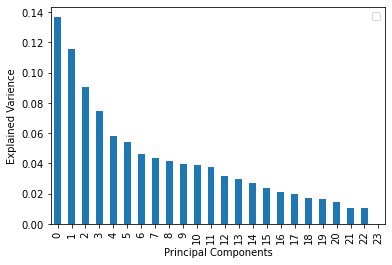

In [48]:
pd.DataFrame(pca_check.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')

**The first two components capture the maximum variance. Therfore taking n_components=2 this time.**

In [50]:
# Define a normalizer
norm = Normalizer()
normalized_mov = norm.fit_transform(movements)

# Reduce the data
pca= PCA(n_components=2)
reduced_data= pca.fit_transform(normalized_mov)

# Create Kmeans model
kmeans = KMeans(n_clusters = 8,max_iter = 1000,init='k-means++')

In [51]:
# Fit the model to reduced data
kmeans.fit(reduced_data)

KMeans(max_iter=1000)

In [52]:
# Prediction
labels = kmeans.predict(reduced_data)
labels

array([2, 2, 7, 4, 6, 4, 1, 6, 7, 6, 2, 2, 3, 6, 5, 5, 1, 0, 0, 3, 3, 0,
       3, 0])

In [53]:
# Create dataframe to store companies and predicted labels
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)
df1

,labels,companies
23,0,Bank of America
21,0,Valero Energy
18,0,Honda
17,0,Toyota
16,1,Johnson & Johnson
6,1,McDonalds
10,2,MasterCard
0,2,Amazon
1,2,Apple
11,2,Microsoft


The cluster formation with PCA reduction is different from the cluster formation without PCA reduction.

<Figure size 432x288 with 0 Axes>

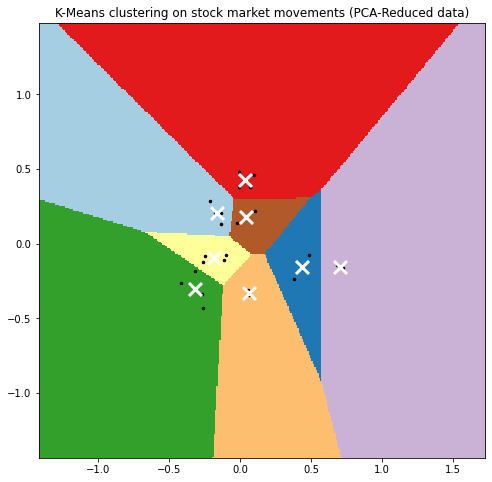

In [54]:
#plotting:

# Define step size of mesh
h = 0.01

# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(8,8))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

Here we can see a meshgrid with 8 clusters and the centers of each cluster are plotted with a white X.

### Conclusion

To summarize, in this project we looked at applying the k-means clustering algorithm, which is a popular unsupervised learning technique in order to group a set of companies.
- We first imported the data using pandas-datareader and Yahoo Finance for 23 stocks for a 2 year period.
- We then calculated each stock's daily price movement from the open and close values.
- We then visualized the stock market movements and saw that we needed to normalize our data.
- We then used the k-means clustering algorithm on our normalized data to predict the label of each company and assigned them to 8 different clusters.
- Finally, we saw how we can reduce the dimensionality of our data to two dimensions with principal component analysis (PCA) and plot it based on the assigned clusters.